# **Decision Tree to predict Healthcare Costs**

Import and Load Libraries

In [1]:
!pip install tabulate

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

Mount Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Files

In [3]:
# Define the correct folder path
base_path = "/content/drive/MyDrive/Capstone Project/Data/"

# Load feature datasets
X_train = pd.read_csv(base_path + "features_train.csv")
X_test = pd.read_csv(base_path + "features_test.csv")

# Load cost datasets (y values) and flatten them
y_train = pd.read_csv(base_path + "cost_train.csv").values.ravel()
y_test = pd.read_csv(base_path + "cost_test.csv").values.ravel()

# Verify dataset shape
print(f"Training Features: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Test Features: {X_test.shape}, Test Labels: {y_test.shape}")

Training Features: (1492974, 138), Training Labels: (1492974,)
Test Features: (639847, 138), Test Labels: (639847,)


Train Decision Tree

In [8]:
# Decision Tree parameters (adjust these as needed)
dt_params = {
    'criterion': 'squared_error',  # regression criterion (MSE)
    'max_depth': 10,                # limit tree depth to prevent overfitting
    'min_samples_split': 10,       # minimum samples required to split
    'min_samples_leaf': 5,         # minimum samples per leaf
    'random_state': 42
}

In [9]:
dt_model = DecisionTreeRegressor(**dt_params)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [10]:
y_pred = dt_model.predict(X_test)

In [11]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Decision Tree Model Performance:")
print(tabulate([
    ["MSE", f"{mse:.2f}"],
    ["RMSE", f"{rmse:.2f}"],
    ["R²", f"{r2:.4f}"]],
    headers=["Metric", "Value"],
    tablefmt="rounded_outline"))

Decision Tree Model Performance:
╭──────────┬─────────╮
│ Metric   │   Value │
├──────────┼─────────┤
│ MSE      │  0.37   │
│ RMSE     │  0.61   │
│ R²       │  0.6257 │
╰──────────┴─────────╯


Feature Selection

In [ ]:
# Extract feature importance
feature_importance = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

In [ ]:
importance_thresholds = [0.98, 0.95, 0.90, 0.85]
results = {}
for threshold in importance_thresholds:
  feature_importance_df['cumulative_importance'] = feature_importance_df['Importance'].cumsum() / feature_importance_df['Importance'].sum()
  selected_features = feature_importance_df[feature_importance_df['cumulative_importance'] <= threshold]['Feature'].tolist()
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]

  dt_model_selected = DecisionTreeRegressor(**dt_params)
  dt_model_selected.fit(X_train_selected, y_train)

  # Make predictions
  y_pred_selected = dt_model_selected.predict(X_test_selected)

  # Calculate Metrics
  mse = mean_squared_error(y_test, y_pred_selected)
  rmse = np.sqrt(mse)
  r2_score_value = r2_score(y_test, y_pred_selected)

  # Store results
  results[threshold] = {
      'n_features': len(selected_features),
      'mse': mse,
      'rmse': rmse,
      'r2_score': r2_score_value,
      'features': selected_features
  }

In [ ]:
# Print results
for threshold, metrics in results.items():
  print(tabulate([
      [f"Threshold: {threshold}"],
      [f"Number of Features: {metrics['n_features']}"],
      [f"MSE: {metrics['mse']:.2f}"],
      [f"RMSE: {metrics['rmse']:.2f}"],
      [f"R² Score: {metrics['r2_score']:.4f}"]],
      headers=["Metric", "Value"],
      tablefmt="rounded_outline"))

╭────────────────────────╮
│ Metric                 │
├────────────────────────┤
│ Threshold: 0.98        │
│ Number of Features: 16 │
│ MSE: 0.50              │
│ RMSE: 0.70             │
│ R² Score: 0.5040       │
╰────────────────────────╯
╭────────────────────────╮
│ Metric                 │
├────────────────────────┤
│ Threshold: 0.95        │
│ Number of Features: 10 │
│ MSE: 0.50              │
│ RMSE: 0.71             │
│ R² Score: 0.4987       │
╰────────────────────────╯
╭───────────────────────╮
│ Metric                │
├───────────────────────┤
│ Threshold: 0.9        │
│ Number of Features: 6 │
│ MSE: 0.52             │
│ RMSE: 0.72            │
│ R² Score: 0.4750      │
╰───────────────────────╯
╭───────────────────────╮
│ Metric                │
├───────────────────────┤
│ Threshold: 0.85       │
│ Number of Features: 4 │
│ MSE: 0.55             │
│ RMSE: 0.74            │
│ R² Score: 0.4497      │
╰───────────────────────╯


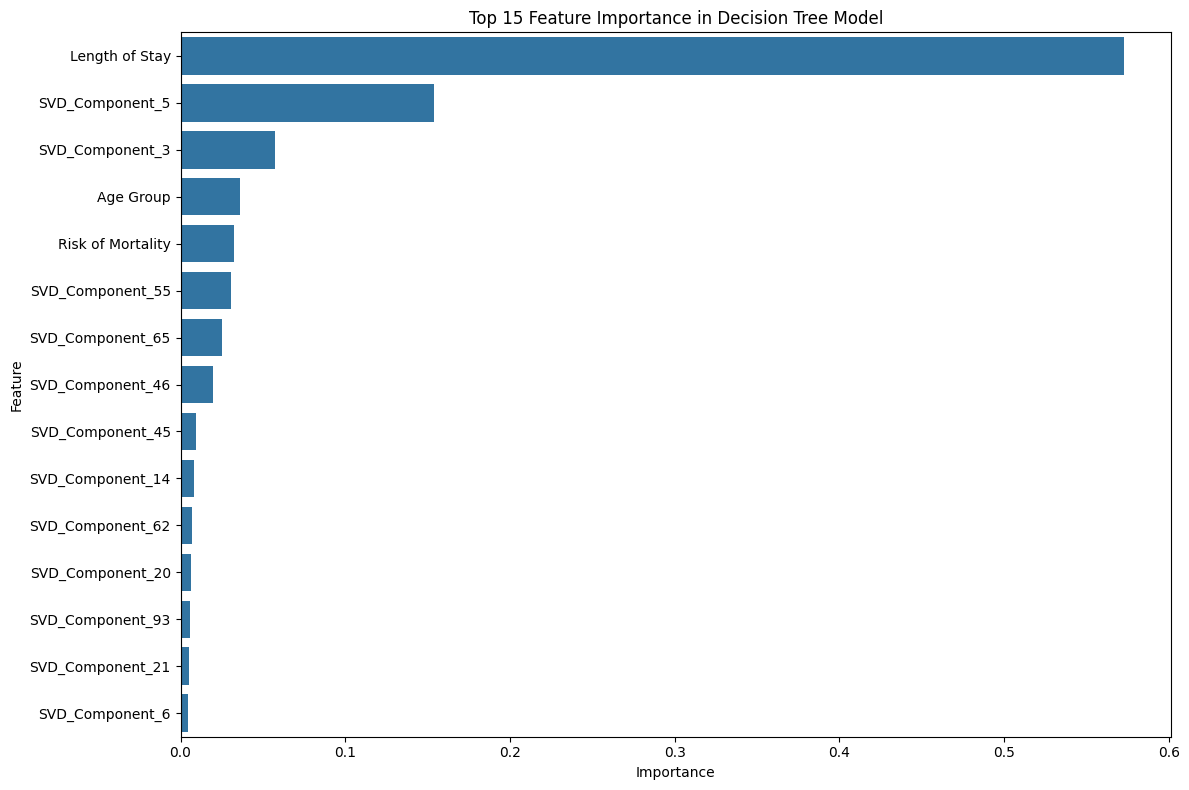

In [ ]:
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)  # Get top 15 features
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15 Feature Importance in Decision Tree Model')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
drive_path = "/content/drive/My Drive/Capstone Project/Code/Models/DecisionTree/dt_model.joblib"
joblib.dump(dt_model, drive_path)
print(f"Model saved to Google Drive: {drive_path}")

Model saved to Google Drive: /content/drive/My Drive/Capstone Project/Code/Models/DecisionTree/dt_model.joblib
